In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("NewCar.csv")
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [3]:
x=df[['normalized-losses', 'wheel-base', 'length', 'width','height', 'curbweight', 'engine-size',
   'compression-ratio', 'horsepower', 'peak-rpm', 'citympg','highway-mpg']]
y=df['price']

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
xpoly=poly.fit_transform(x)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xpoly, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print(l.intercept_)

-55929.83084901178


In [8]:
l.coef_

array([ 0.00000000e+00,  1.21484882e+01,  3.69908568e+01, -8.98516362e+00,
        5.97541041e+02, -4.88437104e+01,  3.36187298e+00,  2.73411924e+01,
        1.01426349e+03,  5.69993030e+01,  4.81398373e-01,  1.79179653e+02,
       -1.82867248e+02])

In [9]:
prediction=l.predict(X_test)

In [10]:
prediction

array([21040.64952398, 17726.34265695, 17839.87363318, 11079.84989995,
       23023.50591182, 12309.56922916, 10614.72563752, 21477.82052299,
       19109.72200434,  8016.86740859, 25079.43889495,  8261.16469448,
       14100.70037476,  9214.50478628, 10591.54650876, 11501.50818929,
        1724.46620109, 10436.95417347, 10574.73714388, 10677.4702479 ,
       21522.52525698, 10051.06139551,  7056.8166934 ,  7128.08943832,
       19305.25961964, 22197.03014667, 10700.88005278, 10894.35083192,
       12220.39039547, 19157.33720865, 22340.92192519, 23706.07487432,
       25247.56454036, 22260.31413134,  7995.052769  , 19781.77456037,
        9626.15258938,  6679.48267015, 14114.14786666, 10253.59565781,
       16102.64207826, 17536.51204198,  7381.3725368 ,  9792.58174197,
        7309.29485494,  7851.02164362, 15771.50958216,  6246.2382748 ,
        6852.13156923, 10789.96187768,  6828.23098872, 14151.12846941,
        6949.99613612, 13190.09168657, 11640.17427121,  7382.18578425,
      

In [11]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

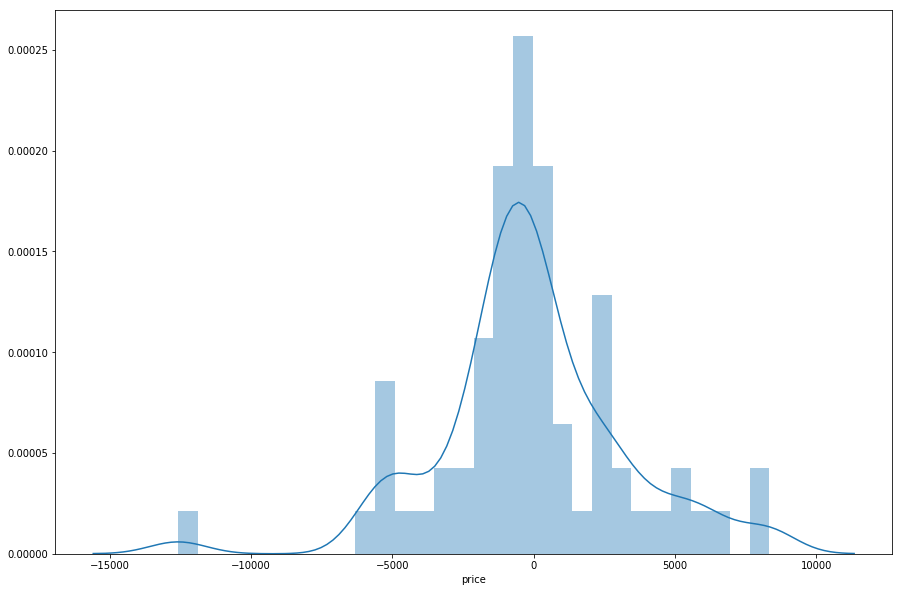

In [12]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [13]:
from sklearn import metrics

In [14]:
metrics.mean_absolute_error(y_test,prediction)

2374.071829349553

In [15]:
metrics.mean_squared_error(y_test,prediction)

11423299.838827377

In [16]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

3379.8372503461433

In [17]:
accuracy = l.score(X_test,y_test)

In [18]:
print(accuracy*100,'%')

74.50527384797452 %


In [19]:
metrics.r2_score(y_train,l.predict(X_train))

0.8232330901113207

In [20]:
metrics.r2_score(y_test,prediction)

0.7450527384797452

#using degree 2 ploynomial results to negative rsquared i.e -1.428
#using degree 3 ploynomial results to negative rsquared i.e -85.49
#goes on increasing
#our model worse. Only, degree 1 polynomial is best as it results 0.74505

# Using Categorical colums too

In [21]:
x=pd.read_csv("CategoriacalCar.csv")

In [22]:
y=x["price"]
x=x.iloc[:,:-1]
x.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,0,1,0


In [23]:
poly1=PolynomialFeatures(degree=1)
xpoly1=poly1.fit_transform(x)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(xpoly1, y, test_size=0.33, random_state=42)

In [25]:
l1=LinearRegression()
l1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print(l.intercept_)

-55929.83084901178


In [27]:
l1.coef_

array([-5.30116666e+14,  9.20038198e+00,  1.54252401e+02,  4.86352846e-01,
        3.59736510e+02,  1.13426036e+02,  8.42612983e+00, -2.43908884e+01,
       -6.43530170e+02,  2.79102325e+01, -7.22645342e-03,  1.10014472e+02,
        2.18685947e+02,  2.20700090e+03, -1.78414468e+02, -2.63883201e+02,
       -5.39050494e+03, -3.17614503e+03, -3.55577020e+03, -7.34422089e+03,
        1.26572356e+04, -2.27299704e+03, -3.94814203e+03, -8.30381697e+02,
       -1.93267624e-12, -4.49075160e+02, -2.75413076e+03, -1.48881971e+02,
       -4.39932097e+02,  1.21086175e+03, -2.20700090e+03,  3.23766365e+02,
        1.49814864e+03, -2.36961788e+02])

In [28]:
prediction=l1.predict(X_test)
prediction

array([21462.5   , 19588.5   , 20801.    , 10823.5625, 15979.5625,
       11983.1875, 13493.4375, 20708.1875, 20596.375 ,  8047.6875,
       28290.6875,  8701.25  , 10517.5625, 13182.5   , 13086.25  ,
        9988.    ,  9411.6875,  9388.375 , 13044.125 ,  8387.1875,
       20481.125 , 10810.3125,  3435.    ,  5263.75  , 30633.5625,
       22597.8125, 13562.5   , 11266.3125, 10256.3125, 24872.3125,
       17538.375 , 20693.125 , 23925.375 , 14579.0625,  7685.25  ,
       17033.25  ,  9146.8125,  6113.375 , 10551.25  ,  9913.0625,
       13513.1875, 18389.1875,  7468.4375,  9577.0625,  7328.    ,
        5544.5625, 17778.9375,  8004.    ,  7821.4375, 10854.6875,
        7980.    , 12858.3125,  6675.125 , 13206.625 , 10259.1875,
        7383.1875, 16853.125 ,  8159.875 , 15086.1875, 13933.25  ,
       18204.0625,  7169.875 , 10245.3125,  7362.    , 16968.5   ,
        3943.3125,  8723.4375])

In [29]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

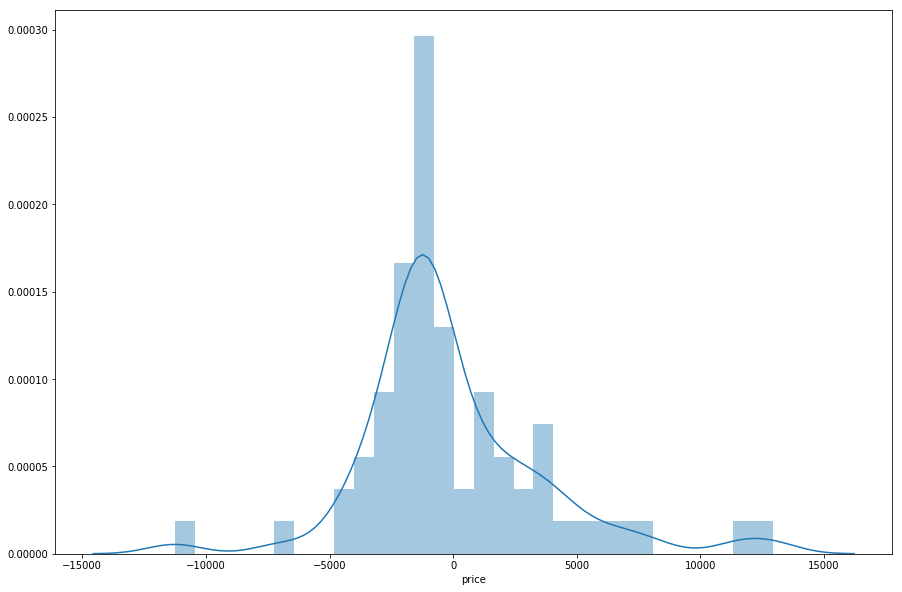

In [30]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [31]:
metrics.mean_absolute_error(y_test,prediction)

2660.176412303767

In [32]:
metrics.mean_squared_error(y_test,prediction)

13951439.204377504

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

3735.162540556636

In [34]:
accuracy = l1.score(X_test,y_test)
print(accuracy*100,'%')

68.86292691598045 %


In [35]:
metrics.r2_score(y_train,l1.predict(X_train))

0.8221809903520406

In [36]:
metrics.r2_score(y_test,prediction)

0.6886292691598045

# using Significant variables only 

In [37]:
x.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,0,1,0


In [38]:
x.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curbweight', 'engine-size', 'compression-ratio', 'horsepower',
       'peak-rpm', 'citympg', 'highway-mpg', 'gas', 'turbo', 'two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear', 'five', 'four', 'six', 'three',
       'twelve', 'two.1', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi'],
      dtype='object')

In [39]:
a=['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curbweight', 'compression-ratio', 'horsepower',
      'citympg',  'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear',  'four', 'six', 'three',
        '1bbl', '2bbl', 'idi', 'mfi', 'mpfi',
       'spdi']

In [40]:
x1=x[a]

In [41]:
poly2=PolynomialFeatures(degree=1)
xpoly1=poly2.fit_transform(x1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(xpoly1, y, test_size=0.33, random_state=42)

In [43]:
l2=LinearRegression()
l2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print(l2.intercept_)

-33056.405614781674


In [45]:
l2.coef_

array([-1.64950883e-10,  1.07992681e+01,  1.86826994e+02, -4.03825609e+01,
        3.17203032e+02, -7.95774850e+01,  4.62446204e+00,  3.36856711e+02,
        4.95948397e+01,  8.72382796e+01,  8.65960264e+02,  9.45386992e+02,
       -4.42550500e+03, -3.99092850e+03, -3.09648852e+03, -4.68872666e+03,
        1.21160580e+04, -3.14944556e+03, -1.95628787e+03, -1.36424205e-12,
       -8.59966887e+02, -9.59557901e+02, -8.65960264e+02, -2.54924916e+03,
        1.21085390e+02, -2.36239225e+03])

In [46]:
prediction=l2.predict(X_test)

In [47]:
prediction

array([20392.73661307, 20969.55416715, 19829.04212515,  9969.55263797,
       22572.1325589 , 11840.90286635, 13131.99946896, 19984.23478254,
       19210.34649424,  8403.03376307, 26652.83839172,  7707.30465682,
       12448.7733864 , 13102.79438078, 12686.57826874, 11989.18655011,
        6322.10758789,  9355.4503438 , 12663.45595855,  9924.55505602,
       19886.4945806 ,  9117.0070049 ,  5599.25912719,  5839.92304441,
       32128.9813296 , 21368.92762895, 11349.16369721,  9747.58365243,
       11920.49122391, 27500.        , 23252.69258796, 25131.54703756,
       24143.06878097, 21479.28247127,  7497.86722052, 17679.86437031,
        9464.64337924,  6259.17833862, 12467.27123456, 10152.75346293,
       13432.1667823 , 17419.81538119,  6727.09411025,  9250.8517194 ,
        7011.96531734,  6873.3194876 , 16286.04509029,  5987.57811216,
        6850.30401656,  9562.37818137,  7704.7911991 , 12952.7168146 ,
        7057.15868394, 16009.81276437,  8831.8437017 ,  7076.76092599,
      

In [48]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

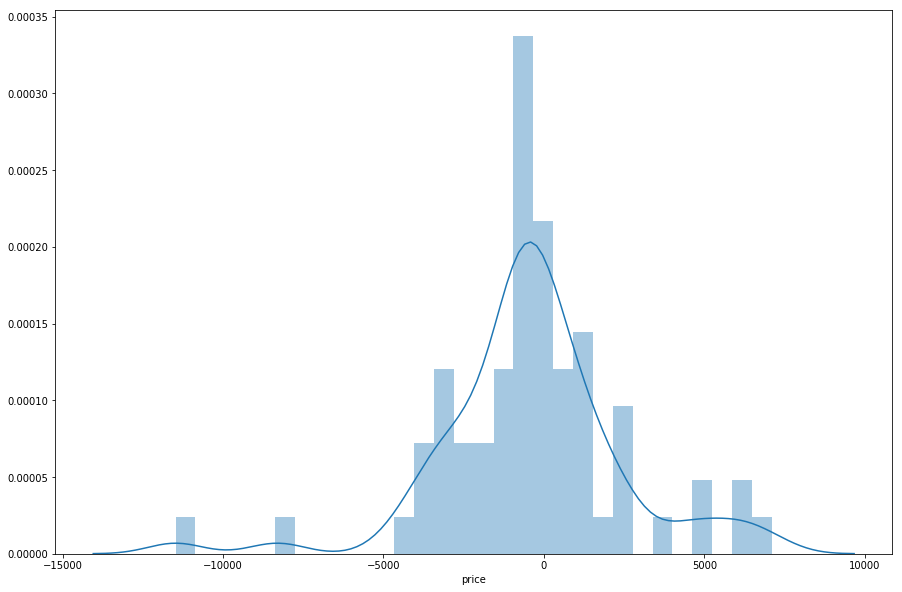

In [49]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [50]:
from sklearn import metrics

In [51]:
metrics.mean_absolute_error(y_test,prediction)

2005.56793872733

In [52]:
metrics.mean_squared_error(y_test,prediction)

8588550.11523139

In [53]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2930.62282036283

In [54]:
accuracy = l2.score(X_test,y_test)
print(accuracy*100,'%')

80.83191929476236 %


In [55]:
metrics.r2_score(y_train,l2.predict(X_train))

0.8805741911648458

In [56]:
metrics.r2_score(y_test,prediction)

0.8083191929476237